## Logistic Regression Model Comparisons

## Introduction

In this lab, we will further investigate some comparisons between our personal logistic regression implementation, that of sci-kit learn and further tuning parameters that can be adjusted in the model.

## Objectives

* Understand and implement logistic regression
* Compare logistic model outputs

In the previous lab, we were able to recreat a logistic regression model output from sci-kit learn that did not include an intercept of regularization. Here, you will continue to analyze the impact of several tuning parameters including the intercept, and regularization parameter which we have not discussed previously.

## Importing the Data

As with the previous lab, import the dataset stored in **heart.csv**

In [1]:
import pandas as pd
import numpy as np
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Problem Formulation

Define X and y as with the previous lab. This time, follow best practices and also implement a standard train-test split.  
**For consistency of results, use random_state=17.**

In [3]:
X = df[df.columns[:-1]]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

print(y_train.value_counts(), '\n')
print(y_test.value_counts())

1.0    130
0.0     97
Name: target, dtype: int64 

0.0    41
1.0    35
Name: target, dtype: int64


## Initial Model - Personal Implementation

Use your code from the previous lab to once again train a logistic regression algorithm on the training set.

In [4]:
# ... where x is the input and the function outputs the result of the sigmoid function:
def sigmoid(x):
    x = np.array(x)
    return 1 / (1 + np.e**(-1*x))

In [5]:
def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    
    # By default, have your function set the initial_weights parameter to a vector 
    # where all feature weights are set to 1.
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    weights = initial_weights
    
    # Create a for-loop of iterations
    for iteration in range(max_iterations):
        
        # Generate predictions using the current feature weights
        predictions = sigmoid(np.dot(X, weights))
        
        # Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        
        # As we saw in the previous lab, calculating the gradient is often the most difficult task
        # Here, you're provided with the closed form solution for the gradient of the log-loss function 
        # derived from MLE:
        gradient = np.dot(X.transpose(),
                          error_vector)
        
        # Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
    
    # Return finalized Weights
    return weights

In [6]:
# grad_desc(X, y, max_iterations, alpha, initial_weights=None)
weights = grad_desc(X, y, 50000, 0.001)
weights

array([ 0.8122867 , -1.61296293,  2.61777735, -1.96890616, -1.50963664,
        0.05698231,  1.15221375,  4.42107696, -0.83034101, -2.74655062,
        1.45579366, -3.11550418, -2.19128237])

## Now use your algorithm to make [probability] predictions on the test set

In [7]:
y_test_pred = sigmoid(np.dot(X_test, weights))

print([round(y, 2) for y in y_test_pred])

[0.92, 0.05, 0.12, 0.1, 0.0, 0.99, 0.26, 0.94, 0.01, 0.75, 0.06, 0.75, 0.47, 0.01, 0.97, 0.56, 0.66, 0.03, 0.98, 0.07, 0.95, 0.97, 0.05, 0.54, 0.76, 0.67, 0.0, 0.08, 0.02, 0.02, 0.78, 0.02, 0.97, 0.09, 0.3, 0.98, 0.76, 0.3, 0.77, 0.99, 0.91, 0.15, 0.01, 0.03, 0.93, 0.91, 0.94, 0.76, 0.04, 0.0, 0.96, 0.01, 0.01, 0.71, 0.83, 0.0, 0.58, 0.55, 0.01, 0.96, 0.11, 0.01, 0.97, 0.3, 0.89, 0.11, 0.82, 0.99, 0.02, 0.23, 0.58, 0.21, 0.98, 0.03, 0.94, 0.96]


## Create an ROC curve for your predictions

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

AUC: 0.9191637630662021


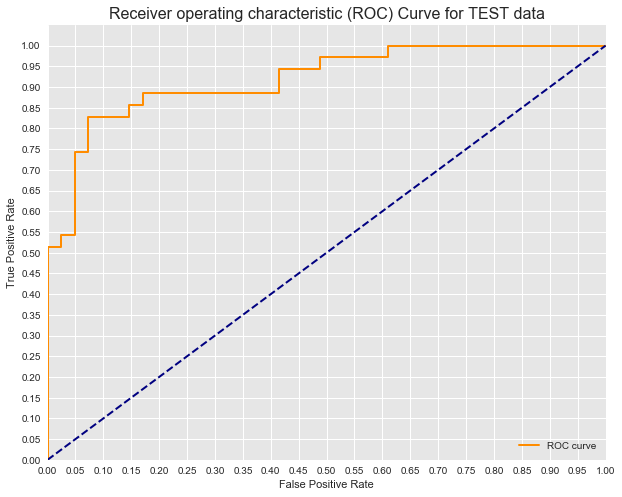

In [9]:
# TEST DATA ONLY
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic (ROC) Curve for TEST data', fontsize=16)
plt.legend(loc="lower right")

print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

## Update your ROC curve to not only include a graph of the test set, but one of the train set

In [10]:
y_train_pred = sigmoid(np.dot(X_train, weights))

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)

Test AUC: 0.9191637630662021
train AUC: 0.9242664551942902


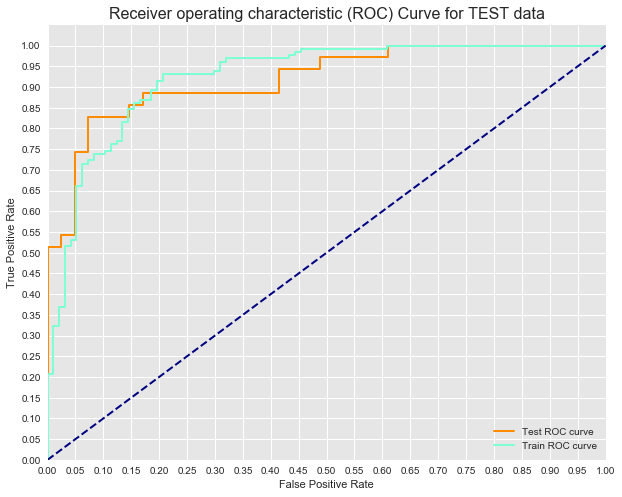

In [11]:
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('train AUC: {}'.format(auc(train_fpr, train_tpr)))

# TEST & TRAIN DATA
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')
plt.plot(train_fpr, train_tpr, color='aquamarine',
         lw=lw, label='Train ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic (ROC) Curve for TEST data', fontsize=16)
plt.legend(loc="lower right")

plt.show()

## Create a confusion matrix for your predictions

Use a standard decision boundary of .5 to convert your probabilities output by logistic regression into binary classifications. (Again this should be for the test set.) Afterwards, feel free to use the built in sci-kit learn methods to compute the confusion matrix as we discussed in previous sections.

In [12]:
def binary_prediction(probabilities, threshold=.5):
    classes = []
    for p in probabilities:
        if p >= threshold:
            classes.append(1)
        else:
            classes.append(0)
    return classes

test_predictions = binary_prediction(y_test_pred)

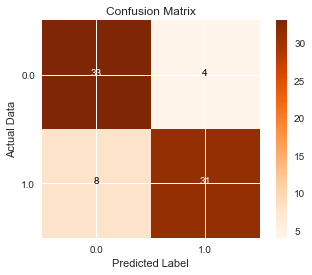

In [13]:
cnf_matrix = confusion_matrix(test_predictions, y_test)

# Create the basic matrix
plt.imshow(cnf_matrix, cmap=plt.cm.Oranges) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('Actual Data')
plt.xlabel('Predicted Label')

# Get class labels to add to matrix
class_names = set(y) 
tick_marks = np.arange(len(class_names))
# Add appropriate axis scales
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. 
# Used for text coloring below

# Here we iterate through the confusion matrix and append labels to our visualization:
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

# Add a side bar legend
plt.colorbar();

## Initial Model - sci-kit learn

Do the same using the built in method from sci-kit learn. To start, create an identical model as you did in the last section; turn off the intercept and set the regularization parameter, C, to a ridiculously large number such as 1e16. 

In [14]:
# turn off the intercept and set the regularization parameter, C, to a ridiculously large number such as 1e16:
logreg = LogisticRegression(fit_intercept=False, C=1e16, solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

## Create an ROC Curve for the sci-kit learn model

In [15]:
y_score = logreg.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC: 0.8996515679442508


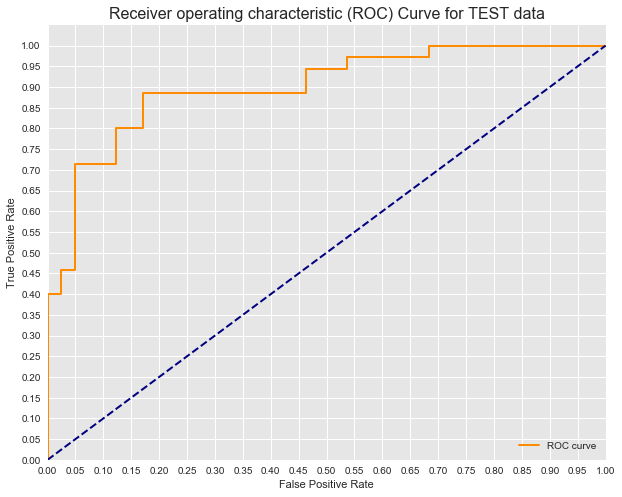

In [16]:
# TEST DATA
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic (ROC) Curve for TEST data', fontsize=16)
plt.legend(loc="lower right")

print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

## As before add an ROC curve to the graph for the train set as well

In [17]:
y_score_test = logreg.decision_function(X_test)
y_score_train = logreg.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_score_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_score_train)

Test AUC: 0.8996515679442508
train AUC: 0.9291038858049168


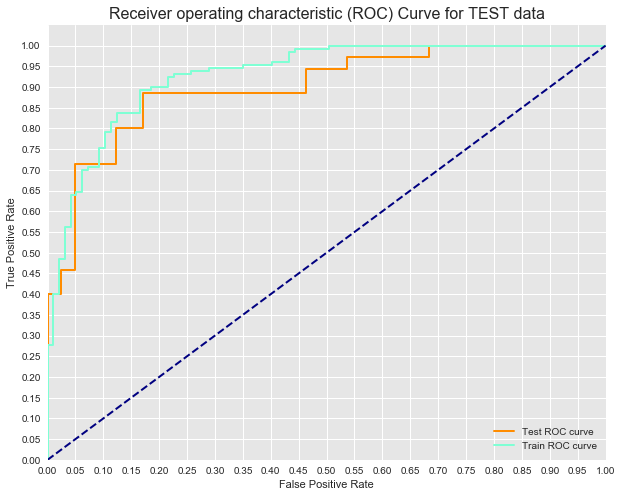

In [18]:
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('train AUC: {}'.format(auc(train_fpr, train_tpr)))

# TEST & TRAIN DATA
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')
plt.plot(train_fpr, train_tpr, color='aquamarine',
         lw=lw, label='Train ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic (ROC) Curve for TEST data', fontsize=16)
plt.legend(loc="lower right")

plt.show()

## Adding an Intercept

Now add an intercept to the sci-kit learn model. Keep the regularization parameter C set to a very large number such as 1e16. Plot all three models ROC curves on the same graph.

In [19]:
# Create model WITH INTERCEPT
logreg_i = LogisticRegression(fit_intercept=True, C=1e16, solver='lbfgs' )
logreg_i.fit(X_train, y_train)

y_score_test_i = logreg_i.decision_function(X_test)
y_score_train_i = logreg_i.decision_function(X_train)

Test AUC: 0.9191637630662021
train AUC: 0.9242664551942902
Sci-kit learn Model 1 Test AUC: 0.8996515679442508
Sci-kit learn Model 1 Train AUC: 0.9291038858049168
Sci-kit learn Model with Intercept Test AUC: 0.8989547038327527
Sci-kit learn Model with intercept Train AUC: 0.9325931800158604


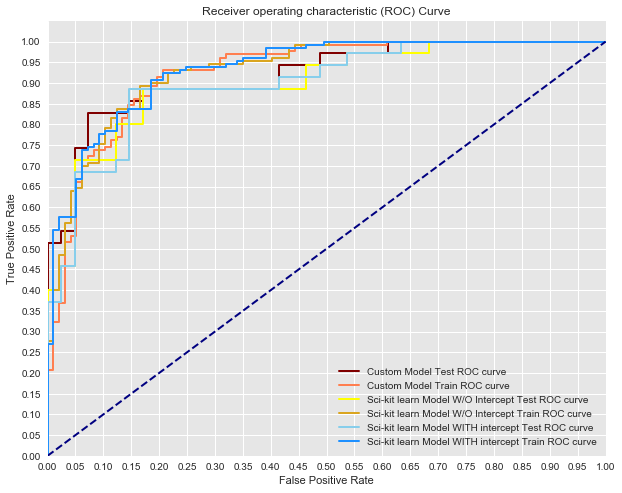

In [20]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(10,8))
lw = 2

# Custom Model Plots
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)

print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.plot(test_fpr, test_tpr, color='maroon',
         lw=lw, label='Custom Model Test ROC curve')
plt.plot(train_fpr, train_tpr, color='coral',
         lw=lw, label='Custom Model Train ROC curve')


# Sci-kit Model Plots - WITHOUT INTERCEPT
y_score_test = logreg.decision_function(X_test)
y_score_train = logreg.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_score_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_score_train)

print('Sci-kit learn Model 1 Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Sci-kit learn Model 1 Train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.plot(test_fpr, test_tpr, color='yellow',
         lw=lw, label='Sci-kit learn Model W/O Intercept Test ROC curve')
plt.plot(train_fpr, train_tpr, color='goldenrod',
         lw=lw, label='Sci-kit learn Model W/O Intercept Train ROC curve')


# Sci-kit Model Plots - WITH INTERCEPT
y_test_score = logreg_i.decision_function(X_test)
y_train_score = logreg_i.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_score_test_i)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_score_train_i)

print('Sci-kit learn Model with Intercept Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Sci-kit learn Model with intercept Train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.plot(test_fpr, test_tpr, color='skyblue',
         lw=lw, label='Sci-kit learn Model WITH intercept Test ROC curve')
plt.plot(train_fpr, train_tpr, color='dodgerblue',
         lw=lw, label='Sci-kit learn Model WITH intercept Train ROC curve')

# Formatting
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At minimum, create 5 different subplots with varying regularization (C) parameters. For each, plot the ROC curve of the train and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and train auc as you go along.

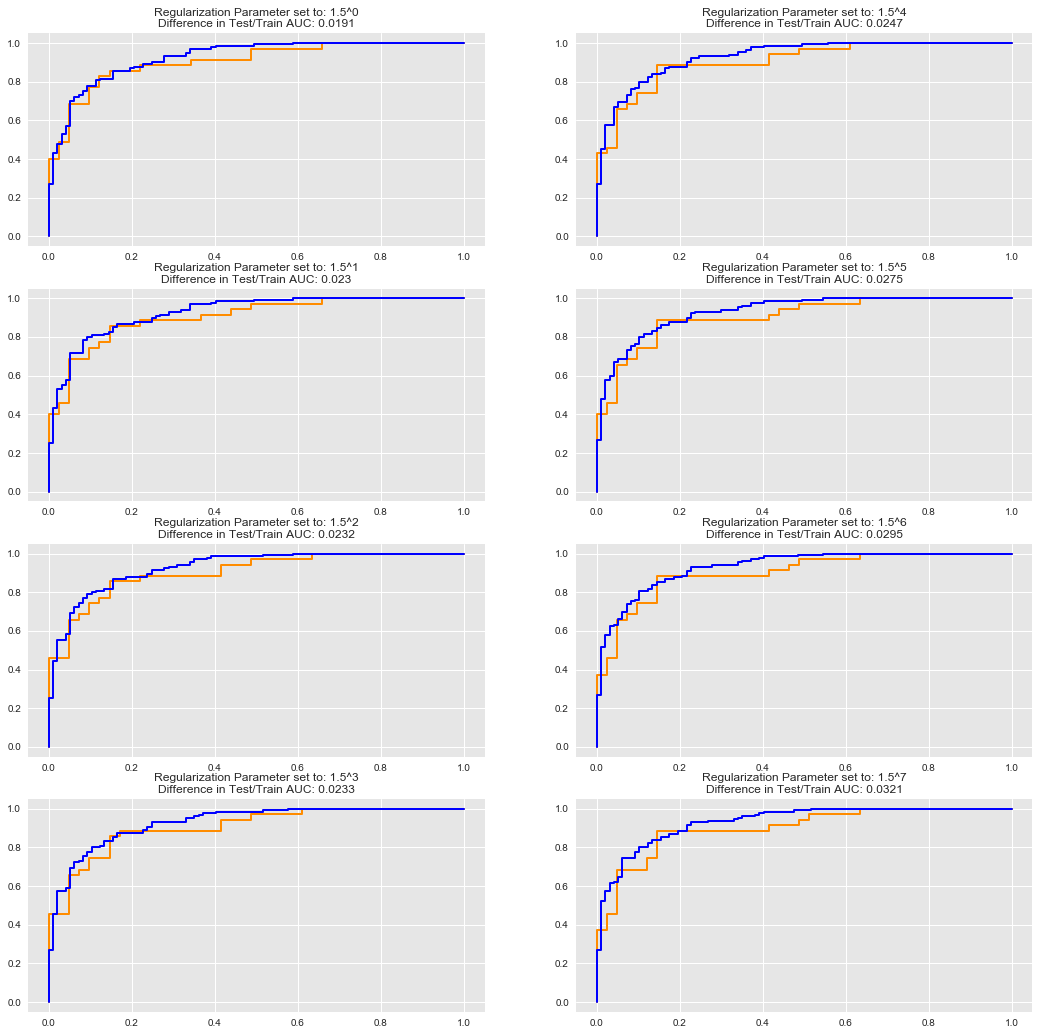

In [21]:
fig, axes = plt.subplots(4,2, figsize=(18,18))

for n in range(8):
    i = n%4
    j = n//4
    ax = axes[i,j]
    
    # Fit a model
    logreg = LogisticRegression(fit_intercept=True, C=1.5**(n), solver='lbfgs')
    logreg.fit(X_train, y_train)
    
    # Print Stats
    y_test_score = logreg.decision_function(X_test)
    y_train_score = logreg.decision_function(X_train)

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    
    test_auc = auc(test_fpr, test_tpr)
    train_auc = auc(train_fpr, train_tpr)
    auc_diff = round(train_auc - test_auc, 4)
    
    # Add the plot
    ax.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')
    ax.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='train ROC curve')
    
    ax.set_title('Regularization Parameter set to: 1.5^{}\nDifference in Test/Train AUC: {}'.format(n, auc_diff))

## Comment on how the Regularization Parameter Impacts the ROC curves plotted above

- With increasing C parameter, we reduce regularization. 
- As such, we see (slightly) larger differences in the AUC score between the test and train set demonstrating potentially (mild) overfitting when we reduce regularization.

## Summary

In this lesson, we reviewed many of the accuracy measures of classification algorithms and observed the impact of additional tuning parameters such as regularization. In the final lessons of this section we will investigate one last method for visualizing our models which can be a useful tool for presenting your model outputs to a non-technical audience.
